1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

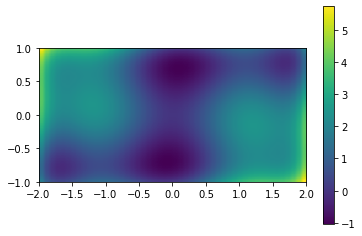

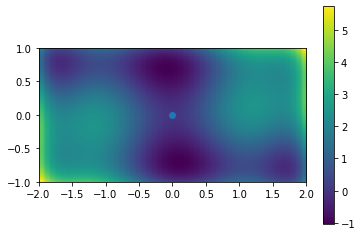

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2)

#visualization of the regions
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
x1, y1 = np.meshgrid(x, y)
plt.figure()
plt.imshow(sixhump([x1, y1]), extent=[-2, 2, -1, 1])
plt.colorbar()

#How many global minima are there, and what is the function value at those points?
#What happens for an initial guess of  (𝑥,𝑦)=(0,0) ?

x_min = optimize.minimize(sixhump, x0=[0, 0])

plt.figure()
plt.imshow(sixhump([x1, y1]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(x_min.x[0], x_min.x[1])
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

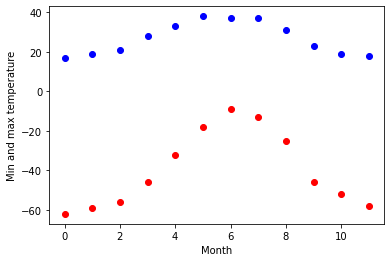

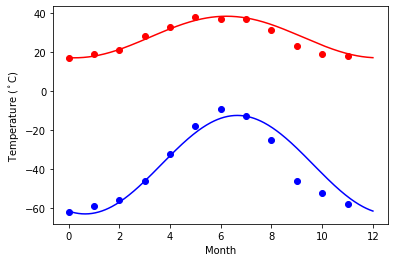

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#Plot these temperatures.
months = np.arange(12)
plt.plot(months, temp_max, 'bo')
plt.plot(months, temp_min, 'ro')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
 
#Find a suitable a function that can describe min and max temperatures. 
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])
#Fit this function to the data with `scipy.optimize.curve_fit()`.Plot the result.
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#*  Is the fit reasonable? If not, why?
#* Is the time offset for min and max temperatures the same within the fit accuracy?

# Yes it is a reasonable fit.


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        6.0000e+00, 9.0000e+00, 2.0000e+01, 1.9400e+02, 1.0894e+04]),
 array([-160.85 , -143.633, -126.416, -109.199,  -91.982,  -74.765,
         -57.548,  -40.331,  -23.114,   -5.897,   11.32 ]),
 <BarContainer object of 10 artists>)

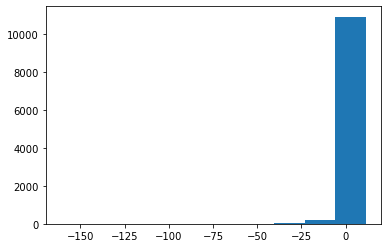

In [5]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt

#load the data into dataframe and conver it to pandas dataframe
data=np.load("residuals_261.pkl",allow_pickle=True).item()
data=pd.DataFrame(data,columns=['residuals'])
data
plt.hist(data,bins=10)


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

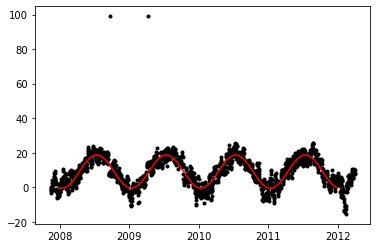

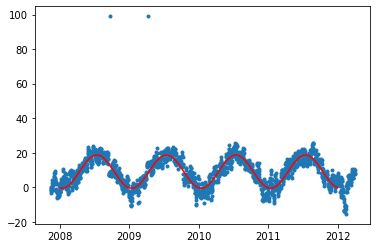

In [71]:
import numpy as np
from scipy.optimize import curve_fit

date,temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)

def f2(t, a, c, d):
    return a * np.cos(2 * np.pi * t + c) + d

popt, pcov = curve_fit(f2, date,temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.',color='black')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, f2(xfine, *popt), color='red')


def g2(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

popt, pcov = curve_fit(g2, date,temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, g2(xfine, *popt), color='red')